In [1]:
# -*- coding: utf-8 -*-
"""shipper_matching.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1fItbgy6RNnw_f_g-guHQisRzaPtBp1zl
"""

import pandas as pd
import numpy as np

import multiprocessing
import itertools
import os
import sys

def get_Enigma():
    return pd.read_csv('enigma_19codes_spain_pipe.csv',sep='|')
def get_Camaras():
    dtype = {'code':int}
    usecols = ['code','company_name','company_address']
    return pd.read_csv('camaras_19codes_spain_pipe.csv',sep='|',usecols = usecols,dtype = dtype)

In [2]:
Enigma = get_Enigma()
Enigma = Enigma.rename(columns={'company_name':'E_com_name','company_address':'E_com_address'})
Camaras = get_Camaras()
Camaras = Camaras.rename(columns={'company_name':'C_com_name','company_address':'C_com_address'})

In [3]:
Enigma.join(Camaras).dropna()

,identifier,harmonized_code,E_com_name,E_com_address,code,C_com_name,C_com_address
0,2018031546919,22042,LA PUERTA DEL SOL S.A. DE CV,ALHAMBRA 506 BIS B COL. PORTALES - 03300 BENIT...,22042.0,EL COTO DE RIOJA SA,CM VIEJO DE LOGROÑO 0 01320 OION-OYON - ALAVA ...
1,2018050958557,22042,EMILIO MORO SL,CTRA. PENAFIEL-VALORIA S/N 47315 PESQUERA DE ...,22042.0,BODEGAS IBAÑESAS DE EXPORTACION SAL,PG IND. PARCELAS 64-65 Y 66 02200 CASAS IBAÑEZ...
2,2018022434007,22042,BODEGAS MURIEL S.L.,CARRETERA DE LAGUARDIA S/N ELCIEGO 01340 SPAIN,22042.0,ANTONIO NADAL SA,CL CONRADORS 22 07141 MARRATXI - MAJORCA (B...
3,2018013123225,22042,HAMMEKEN CELLARS SL,CALLE DE LA MUELA 16 ALICANTE 03730 SPAIN,22042.0,FREIXENET SA,CL JOAN SALA 2 08770 S SADURNI AN - BARCELONA ...
4,2018012352782,22042,BALGUERIE,. 447 BOULEVARD ALFRED DANEY BORDEAUX 33075 FR,22042.0,GRUPO ANTOLIN-IRAUSA SA,CR MADRID IRUN 244 09007 BURGOS - BURGOS (C...
5,2018030162711,22042,JF HILLEBRAND FRANCE (BEAUNE),11 RUE LOUIS ET GASTON CHEVROLET FR62392166781...,22042.0,SANCHEZ ROMATE HERMANOS SA,CL LEALAS 26 11404 JEREZ FRONTE - CADIZ (AN...
6,2018030336878,22042,JF HILLEBRAND SPAIN SA,AVDA CATEDRAL 6-8 2 1A 08002 BARCELONA SPAIN,22042.0,GONZALEZ BYASS SA,CL MANUEL MARIA GLEZ 12 11403 JEREZ FRONTE - C...
7,2018051073943,22042,ALBATRANS SPAIN S.L.,. RONDA UNIVERSITAT 33 1-1A B BARCE LONA 08...,22042.0,ALCOHOLES Y VINOS SA,CR ZANCARA KM 1 13630 SOCUELLAMOS - CIUDAD REA...
8,2018030950787,22042,FELIX SOLIS AVANTIS S.A.,AUTOVIA DEL SUR KM 199 13300 VALDEPENAS SPAIN...,22042.0,FELIX SOLIS SA,CR AUTOVIA MADRID_CADIZ 199 13300 VALDEPEÑAS -...
9,2018011827458,22042,CVA CIA DE VINOS DEL ATLANTICO S.L.,S. PINTOR ROSALES 56 1-IZQ. 28008 MADRID ES ...,22042.0,OLIVEDA SA,CL ROCA 3 17750 CAPMANY - GIRONA (CATALONIA)


In [4]:
len(Camaras)

1072

In [8]:
Enigma.head()

,identifier,harmonized_code,E_com_name,E_com_address
0,2018031546919,22042,LA PUERTA DEL SOL S.A. DE CV,ALHAMBRA 506 BIS B COL. PORTALES - 03300 BENIT...
1,2018050958557,22042,EMILIO MORO SL,CTRA. PENAFIEL-VALORIA S/N 47315 PESQUERA DE ...
2,2018022434007,22042,BODEGAS MURIEL S.L.,CARRETERA DE LAGUARDIA S/N ELCIEGO 01340 SPAIN
3,2018013123225,22042,HAMMEKEN CELLARS SL,CALLE DE LA MUELA 16 ALICANTE 03730 SPAIN
4,2018012352782,22042,BALGUERIE,. 447 BOULEVARD ALFRED DANEY BORDEAUX 33075 FR


In [9]:
Enigma.tail()

,identifier,harmonized_code,E_com_name,E_com_address
3231,2018011031393,22041,BODEGAS BORSAO S.A.,CARRETERA NACIONAL 122 KM 63 BORJA 50540 SPAIN
3232,2018020142671,22041,CHERUBINO VALSANGIACOMO S.A.,CTRA CHESTE-GODELLETA KM 1 46370 CHIVA VALEN...
3233,2018011949272,22041,QUALITAIR AND SEA MARSEILLE,35 BD DU CAPITAINE GEZE 13014 MARSEILLE FRANCE...
3234,2018051839874,22041,BODEGAS LOPEZ MORENAS S.L.,CALLE MELILLA 13 FUENTE DEL MAESTRE 06360 SPAIN
3235,2018021412294,22041,DHL GLOBAL FORWARDING D.O.O.,BULEVAR MILUTINA MILANKOVICA 9DJ (G 11070 BELG...


In [12]:
pd.DataFrame(np.roll(Enigma,2,axis=0),columns=Enigma.columns).join(Camaras).dropna()

,identifier,harmonized_code,E_com_name,E_com_address,code,C_com_name,C_com_address
0,2018051839874,22041,BODEGAS LOPEZ MORENAS S.L.,CALLE MELILLA 13 FUENTE DEL MAESTRE 06360 SPAIN,22042.0,EL COTO DE RIOJA SA,CM VIEJO DE LOGROÑO 0 01320 OION-OYON - ALAVA ...
1,2018021412294,22041,DHL GLOBAL FORWARDING D.O.O.,BULEVAR MILUTINA MILANKOVICA 9DJ (G 11070 BELG...,22042.0,BODEGAS IBAÑESAS DE EXPORTACION SAL,PG IND. PARCELAS 64-65 Y 66 02200 CASAS IBAÑEZ...
2,2018031546919,22042,LA PUERTA DEL SOL S.A. DE CV,ALHAMBRA 506 BIS B COL. PORTALES - 03300 BENIT...,22042.0,ANTONIO NADAL SA,CL CONRADORS 22 07141 MARRATXI - MAJORCA (B...
3,2018050958557,22042,EMILIO MORO SL,CTRA. PENAFIEL-VALORIA S/N 47315 PESQUERA DE ...,22042.0,FREIXENET SA,CL JOAN SALA 2 08770 S SADURNI AN - BARCELONA ...
4,2018022434007,22042,BODEGAS MURIEL S.L.,CARRETERA DE LAGUARDIA S/N ELCIEGO 01340 SPAIN,22042.0,GRUPO ANTOLIN-IRAUSA SA,CR MADRID IRUN 244 09007 BURGOS - BURGOS (C...
5,2018013123225,22042,HAMMEKEN CELLARS SL,CALLE DE LA MUELA 16 ALICANTE 03730 SPAIN,22042.0,SANCHEZ ROMATE HERMANOS SA,CL LEALAS 26 11404 JEREZ FRONTE - CADIZ (AN...
6,2018012352782,22042,BALGUERIE,. 447 BOULEVARD ALFRED DANEY BORDEAUX 33075 FR,22042.0,GONZALEZ BYASS SA,CL MANUEL MARIA GLEZ 12 11403 JEREZ FRONTE - C...
7,2018030162711,22042,JF HILLEBRAND FRANCE (BEAUNE),11 RUE LOUIS ET GASTON CHEVROLET FR62392166781...,22042.0,ALCOHOLES Y VINOS SA,CR ZANCARA KM 1 13630 SOCUELLAMOS - CIUDAD REA...
8,2018030336878,22042,JF HILLEBRAND SPAIN SA,AVDA CATEDRAL 6-8 2 1A 08002 BARCELONA SPAIN,22042.0,FELIX SOLIS SA,CR AUTOVIA MADRID_CADIZ 199 13300 VALDEPEÑAS -...
9,2018051073943,22042,ALBATRANS SPAIN S.L.,. RONDA UNIVERSITAT 33 1-1A B BARCE LONA 08...,22042.0,OLIVEDA SA,CL ROCA 3 17750 CAPMANY - GIRONA (CATALONIA)


In [16]:
data = pd.read_csv('match_by_levenshtein/new_test.csv',sep='|')

In [17]:
data

,identifier,harmonized_code,code,E_com_name,C_com_name,name_score,E_cl_com_name,C_cl_com_name,E_com_address,C_com_address,address_score
0,2018052620428,15091,15091.0,ACEITES ABASA SA,ACEITES ABASA SA,1.000000,ACEITES ABASA SA,ACEITES ABASA SA,AVDA. EDUARDO DATO N.69 5 PLANTA SEVILLA 41...,AV ALEMANIA 0 14850 BAENA - CORDOBA (ANDALU...,0.400000
1,2018052522422,15091,15091.0,ACEITES CANOLIVA SL,ACEITES MAEVA SL,0.800000,ACEITES CANOLIVA SL,ACEITES MAEVA SL,CARRETERA CANETE DE LA TORRE KM 3 BAENA 14...,PG JUNCARIL PARCELA 334 18220 ALBOLOTE - GRANA...,0.382609
2,2018031351660,15091,15091.0,ACEITES DEL SUR COOSUR SA,ACEITES DEL SUR-COOSUR SA,0.960000,ACEITES DEL SUR COOSUR SA,ACEITES DEL SUR-COOSUR SA,CTRA. MADRID-CADIZ KM.550 6 DOS HERMANAS 417...,CR DE LA CAROLINA 0 00 23220 VILCHES - JAEN ...,0.410714
3,2018031351660,15091,20057.0,ACEITES DEL SUR COOSUR SA,ACEITES DEL SUR-COOSUR SA,0.960000,ACEITES DEL SUR COOSUR SA,ACEITES DEL SUR-COOSUR SA,CTRA. MADRID-CADIZ KM.550 6 DOS HERMANAS 417...,CR DE LA CAROLINA 0 00 23220 VILCHES - JAEN ...,0.410714
4,2018052857322,15091,15091.0,ACEITES MAEVA S.L.,ACEITES MAEVA SL,0.969697,ACEITES MAEVA SL,ACEITES MAEVA SL,PARQUE METROPOLITANO AVDA. INCAR 8 ESCUZAR 1...,PG JUNCARIL PARCELA 334 18220 ALBOLOTE - GRANA...,0.319328
5,2018031427738,15091,15091.0,ACEITES MAEVA SL,ACEITES MAEVA SL,1.000000,ACEITES MAEVA SL,ACEITES MAEVA SL,NUM 8 AVENIDA INCAR PARQUE METROPOL ITANO GRAN...,PG JUNCARIL PARCELA 334 18220 ALBOLOTE - GRANA...,0.431655
6,2018032137580,15091,15091.0,ACEITES YBARRA S.A.,ACEITES ABASA SA,0.823529,ACEITES YBARRA SA,ACEITES ABASA SA,CARRETERA ISLA MENOR KM 1 8 DOS HERMANAS 417...,AV ALEMANIA 0 14850 BAENA - CORDOBA (ANDALU...,0.365385
7,2018050439969,15091,15091.0,ACEITES YBARRA S.A.,ACEITES ABASA SA,0.848485,ACEITES YBARRA SA,ACEITES ABASA SA,CTRA. NACIONAL IV KM. 387.5 ALCOLEA DE CORDOBA...,AV ALEMANIA 0 14850 BAENA - CORDOBA (ANDALU...,0.448276
8,2018052122866,20057,15091.0,AGRO SEVILLA ACEITUNAS S.C.A.,AGRO SEVILLA ACEITUNAS S COOP AND,0.866667,AGRO SEVILLA ACEITUNAS SCA,AGRO SEVILLA ACEITUNAS S COOP AND,AVENIDA DE LA INNOVACION S/N EDIFICIO RENTA S...,AV INNOVACION RENTA SEVIL 8 41020 SEVILLA - SE...,0.630872
9,2018052122866,20057,20057.0,AGRO SEVILLA ACEITUNAS S.C.A.,AGRO SEVILLA ACEITUNAS S COOP AND,0.866667,AGRO SEVILLA ACEITUNAS SCA,AGRO SEVILLA ACEITUNAS S COOP AND,AVENIDA DE LA INNOVACION S/N EDIFICIO RENTA S...,AV INNOVACION RENTA SEVIL 8 41020 SEVILLA - SE...,0.630872


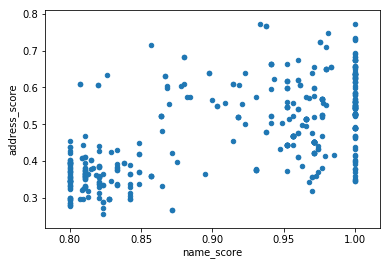

In [24]:
data[['name_score','address_score']].plot.scatter(x='name_score',y='address_score')